In [31]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [58]:
ave_price = np.random.gamma(2, 200, 365*3)
x = np.random.normal(0, 1, 365*3)
y = np.random.normal(0, 1, 365*3)
n_purchases = np.random.poisson(2*np.exp(.5*x + .1*y), 365*3)
actual_sales = ave_price * n_purchases
sales = np.round((ave_price * n_purchases)/1000, 0)*1000
date = pd.date_range('2015-01-01', periods=365*3, freq='D')
df = pd.DataFrame({'date': date, 'ave_price': ave_price, 'n_purchases': n_purchases, 'sales': sales, 'actual_sales': actual_sales, 'x': x, 'y': y})
df.head()

,date,ave_price,n_purchases,sales,actual_sales,x,y
0,2015-01-01,264.470906,3,1000.0,793.412718,0.018435,-1.395470
1,2015-01-02,277.591852,5,1000.0,1387.959260,-0.185166,-0.177000
2,2015-01-03,35.608248,2,0.0,71.216495,-0.334055,0.154490
3,2015-01-04,221.936484,1,0.0,221.936484,-0.413826,0.328706
4,2015-01-05,297.992939,4,1000.0,1191.971758,-1.344236,0.302019


In [73]:
weekly_df = df.set_index('date').resample("W-MON").agg({'n_purchases': 'sum', 'sales': 'sum', 'actual_sales': 'sum', 'x': 'mean', 'y': 'mean'})

In [74]:
weekly_df["ave_price"] = weekly_df["actual_sales"] / weekly_df["n_purchases"]

In [75]:
weekly_df['ln_ave_price'] = np.log(weekly_df['ave_price'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     86.91
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           8.46e-33
Time:                        13:43:24   Log-Likelihood:                -36.262
No. Observations:                 156   AIC:                             80.52
Df Residuals:                     152   BIC:                             92.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1441      0.451      4.750      0.000       1.252       3.036
ln_ave_price     1.0854      0.076     14.261      0.000       0.935       1.236
x                0.4560      0.069      6.655      0.000       0.321       0.591
y                0.2072      0.068      3.048      0.003       0.073       0.341
==============================================================================
Omnibus:                       15.361   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.227
Skew:                          -0.701   Prob(JB):                     0.000182
Kurtosis:                       3.828   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

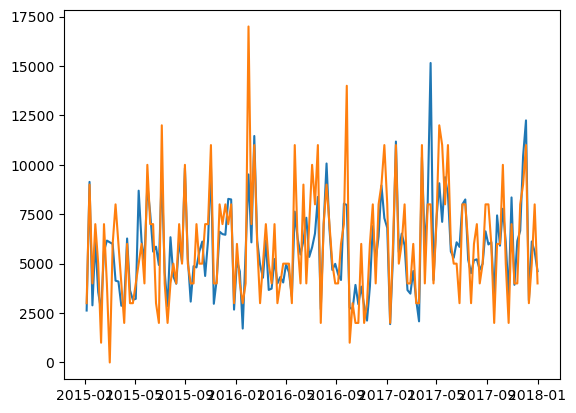

In [76]:
model_round = sm.GLM((weekly_df[weekly_df['sales']>0]["sales"]), sm.add_constant(weekly_df[weekly_df['sales']>0][["ln_ave_price", 'x', 'y']]), family=sm.families.).fit()
plt.plot(weekly_df[weekly_df['sales']>0].index, np.exp(model_round.predict()))
plt.plot(weekly_df.index, (weekly_df["sales"]))
model_round.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           actual_sales   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.57e-39
Time:                        13:43:25   Log-Likelihood:                -6.4034
No. Observations:                 157   AIC:                             20.81
Df Residuals:                     153   BIC:                             33.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7129      0.359      7.547      0.000       2.003       3.423
ln_ave_price     0.9997      0.061     16.478      0.000       0.880       1.120
x                0.4605      0.056      8.157      0.000       0.349       0.572
y                0.2076      0.056      3.700      0.000       0.097       0.318
==============================================================================
Omnibus:                       17.856   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.147
Skew:                          -0.669   Prob(JB):                     5.71e-06
Kurtosis:                       4.379   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

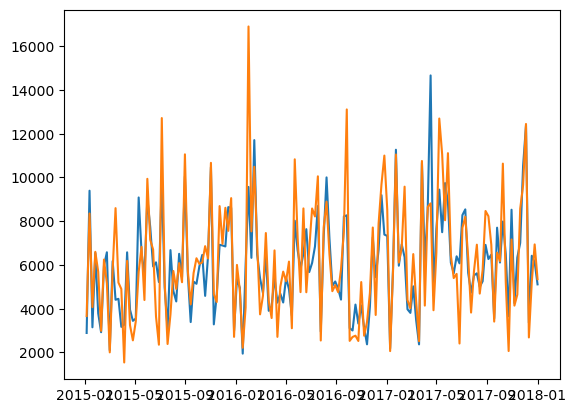

In [77]:
not_rounded = sm.OLS(np.log(weekly_df[weekly_df['actual_sales']>0]["actual_sales"]), sm.add_constant(weekly_df[weekly_df['actual_sales']>0][["ln_ave_price", 'x', 'y']])).fit()
plt.plot(weekly_df[weekly_df['actual_sales']>0].index, np.exp(not_rounded.predict()))
plt.plot(weekly_df.index, (weekly_df["actual_sales"]))
not_rounded.summary()

<Axes: xlabel='date'>

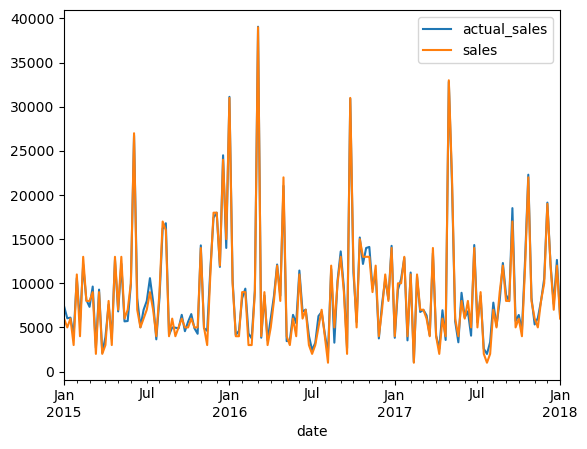

In [19]:
weekly_df[['actual_sales', 'sales']].plot()